# Proyecto energía analisis bivariado

## Integrantes

- Enrique Laguna Diaz
- Hector Aaron Ramirez Obregon
- Humberto Peñuelas Almeida

## Imports

In [7]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


## Importar datos del nuevo csv con datos limpiados

In [8]:
path = "Clean_Energy.csv"
energia_df = pd.read_csv(path,sep=",",encoding="utf-8")

In [9]:
energia_df

,register_id,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION
0,0,2001,1,AK,Total Electric Power Industry,Coal,46903.0
1,1,2001,1,AK,Total Electric Power Industry,Petroleum,71085.0
2,2,2001,1,AK,Total Electric Power Industry,Natural Gas,367521.0
3,3,2001,1,AK,Total Electric Power Industry,Hydroelectric Conventional,104549.0
4,4,2001,1,AK,Total Electric Power Industry,Wind,87.0
...,...,...,...,...,...,...,...
496769,10581,2022,5,WY,"Electric Generators, Electric Utilities",Coal,2071403.0
496770,10582,2022,5,WY,"Electric Generators, Electric Utilities",Hydroelectric Conventional,96790.0
496771,10583,2022,5,WY,"Electric Generators, Electric Utilities",Natural Gas,91570.0
496772,10584,2022,5,WY,"Electric Generators, Electric Utilities",Petroleum,1812.0


array(['Total Electric Power Industry',
       'Electric Generators, Electric Utilities',
       'Combined Heat and Power, Electric Power',
       'Combined Heat and Power, Commercial Power',
       'Combined Heat and Power, Industrial Power',
       'Electric Generators, Independent Power Producers'], dtype=object)

numpy.ndarray

LabelEncoder()

['Combined Heat and Power, Commercial Power',
 'Combined Heat and Power, Electric Power',
 'Combined Heat and Power, Industrial Power',
 'Electric Generators, Electric Utilities',
 'Electric Generators, Independent Power Producers',
 'Total Electric Power Industry']

array(['Coal', 'Petroleum', 'Natural Gas', 'Hydroelectric Conventional',
       'Wind', 'Total', 'Other Gases', 'Nuclear',
       'Wood and Wood Derived Fuels', 'Other Biomass', 'Other',
       'Solar Thermal and Photovoltaic', 'Pumped Storage', 'Geothermal'],
      dtype=object)

<AxesSubplot:xlabel='y'>

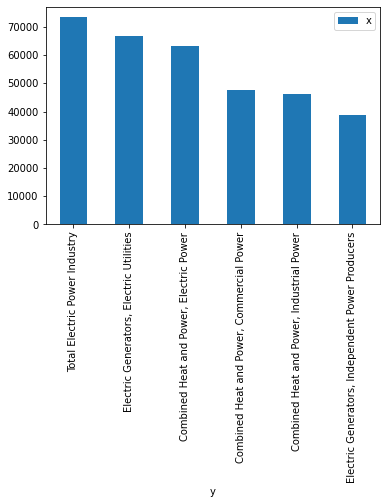

In [10]:
producer_type = energia_df['TYPE OF PRODUCER'].unique()
producer_type
type(producer_type)
TEPI = energia_df.loc[energia_df['TYPE OF PRODUCER'] == 'Total Electric Power Industry']

# tranformar variables no numericas a numericas
le = preprocessing.LabelEncoder()
le.fit(producer_type)

list(le.classes_)

numeric_producer_type = le.transform(producer_type)
#np.sort(numeric_producer_type)

energy_sr = energia_df['ENERGY SOURCE'].unique()
energy_sr

count_producers = energia_df['ENERGY SOURCE'].value_counts()
num_producers = count_producers.values
#np.sort(num_producers)

df = pd.DataFrame({'x':num_producers[:6], 'y': producer_type[:6]})
#df.sort_values(by=['x', 'y'])
df.plot('y','x', kind='bar')

In [11]:
energyYear2020 = energia_df.loc[(energia_df['ENERGY SOURCE'] == 'Coal') &(energia_df['YEAR'] == 2001)]

energyYear2020[['GENERATION']].sum()
#print(energyYear2020)

energy_sources = ['Coal', 'Petroleum', 'Natural Gas', 'Hydroelectric Conventional',
       'Wind', 'Total', 'Other Gases', 'Nuclear',
       'Wood and Wood Derived Fuels', 'Other Biomass', 'Other',
       'Solar Thermal and Photovoltaic', 'Pumped Storage', 'Geothermal']


years = [2001+i for i in range(22)]
#years

acumulados = pd.DataFrame(columns = ['Año','Fuente','Total'])

# para cado año se van a calcular la producion total de cada fuente de energía
for i in years:

       for j in energy_sources:
              # se crea un data frame temporal filtrado por fuente de energia y año
              # a nuestro data frame de acumulados se le va a agregar una fila que contenga  añ, fuente, acumulado
              temp = energia_df.loc[(energia_df['ENERGY SOURCE'] == j) &(energia_df['YEAR'] == i)]
              acumulados.loc[len(acumulados.index)] = [i,j,temp['GENERATION'].sum()]

acumulados




GENERATION    7.615824e+09
dtype: float64

,Año,Fuente,Total
0,2001,Coal,7.615824e+09
1,2001,Petroleum,4.995209e+08
2,2001,Natural Gas,2.556516e+09
3,2001,Hydroelectric Conventional,8.678442e+08
4,2001,Wind,2.694933e+07
...,...,...,...
303,2022,Other Biomass,2.831480e+07
304,2022,Other,1.902484e+07
305,2022,Solar Thermal and Photovoltaic,2.309289e+08
306,2022,Pumped Storage,-7.820192e+06


In [12]:
columnas = ['Año'] + energy_sources

acumulados = pd.DataFrame(columns = columnas)

for i in years:
    
    temp = energia_df.loc[(energia_df['YEAR'] == i)]
    lista = [str(i)]

    for j in energy_sources:

        temp2 = temp.loc[(temp['ENERGY SOURCE'] == j)]
        lista.append(temp2['GENERATION'].sum())
    acumulados.loc[len(acumulados.index)] = lista

acumulados

,Año,Coal,Petroleum,Natural Gas,Hydroelectric Conventional,Wind,Total,Other Gases,Nuclear,Wood and Wood Derived Fuels,Other Biomass,Other,Solar Thermal and Photovoltaic,Pumped Storage,Geothermal
0,2001,7.615824e+09,4.995209e+08,2.556516e+09,8.678442e+08,2.694933e+07,1.494657e+10,36157892.00,3.075305e+09,1.407996e+08,58192597.00,47625387.00,2.171020e+06,-35293780.00,54962004.00
1,2002,7.732521e+09,3.782696e+08,2.764023e+09,1.057315e+09,4.141711e+07,1.543381e+10,45850741.00,3.120256e+09,1.546602e+08,60174860.00,54107645.00,2.219324e+06,-34971714.00,57965243.00
2,2003,7.894947e+09,4.776226e+08,2.599630e+09,1.103225e+09,4.474987e+07,1.553274e+10,62400086.00,3.054931e+09,1.501164e+08,63248009.00,56178049.00,2.136004e+06,-34140260.00,57696920.00
3,2004,7.913202e+09,4.845803e+08,2.840400e+09,1.073669e+09,5.657498e+07,1.588222e+10,61009705.00,3.154114e+09,1.524675e+08,61682301.00,56929637.00,2.300628e+06,-33952840.00,59243898.00
4,2005,8.051492e+09,4.889001e+08,3.043841e+09,1.081285e+09,7.124221e+07,1.622169e+10,53856592.00,3.127945e+09,1.554257e+08,61681589.00,51284219.00,2.201173e+06,-26231150.00,58766978.00
5,2006,7.962045e+09,2.566657e+08,3.265763e+09,1.156986e+09,1.063566e+08,1.625881e+10,56707221.00,3.148875e+09,1.550484e+08,64394129.00,51897603.00,2.030816e+06,-26231368.00,58272114.00
6,2007,8.065822e+09,2.629559e+08,3.586359e+09,9.900399e+08,1.377997e+08,1.662698e+10,53813418.00,3.225699e+09,1.560561e+08,66098215.00,48924540.00,2.447170e+06,-27585408.00,58548852.00
7,2008,7.943205e+09,1.849704e+08,3.531922e+09,1.019326e+09,2.214524e+08,1.647755e+10,46827494.00,3.224834e+09,1.491994e+08,70935046.00,47214652.00,3.457256e+06,-25152248.00,59359904.00
8,2009,7.023617e+09,1.557461e+08,3.683915e+09,1.093780e+09,2.955445e+08,1.580132e+10,42528438.00,3.195418e+09,1.442006e+08,73770406.00,47713342.00,3.564716e+06,-18509380.00,60034634.00
9,2010,7.389161e+09,1.482440e+08,3.950789e+09,1.040812e+09,3.786090e+08,1.650024e+10,45251157.00,3.227873e+09,1.486886e+08,75668852.00,51421360.00,4.848730e+06,-22004528.00,60876850.00


0           46903.0
1           71085.0
2          367521.0
3          104549.0
4              87.0
            ...    
496769    2071403.0
496770      96790.0
496771      91570.0
496772       1812.0
496773     452913.0
Name: GENERATION, Length: 496774, dtype: float64

pandas.core.series.Series

LabelEncoder()

[-997855.0,
 -934630.0,
 -928405.0,
 -902068.0,
 -888367.0,
 -870786.0,
 -863077.0,
 -840357.0,
 -817999.0,
 -810802.0,
 -806466.0,
 -805987.0,
 -802368.0,
 -799080.0,
 -795915.0,
 -795706.0,
 -787128.0,
 -783894.0,
 -783638.0,
 -777512.0,
 -776518.0,
 -773650.0,
 -773345.0,
 -769637.0,
 -769142.0,
 -768241.0,
 -764862.0,
 -762338.0,
 -760235.0,
 -759494.0,
 -758887.0,
 -752869.0,
 -750105.0,
 -747235.0,
 -745514.0,
 -745491.0,
 -745140.0,
 -743432.0,
 -739657.0,
 -732284.0,
 -732257.0,
 -725387.0,
 -718404.0,
 -718196.0,
 -715850.0,
 -715350.0,
 -714613.0,
 -707893.08,
 -706956.0,
 -703186.0,
 -699779.0,
 -695409.0,
 -694881.0,
 -693449.0,
 -691561.0,
 -689162.0,
 -689108.0,
 -688911.0,
 -688228.0,
 -685626.0,
 -684750.0,
 -684133.0,
 -680998.0,
 -680805.0,
 -680144.0,
 -679520.0,
 -678175.0,
 -677730.0,
 -676586.0,
 -675345.0,
 -674567.0,
 -671214.0,
 -669751.0,
 -668890.0,
 -668753.0,
 -668228.0,
 -667323.0,
 -666752.0,
 -666344.0,
 -664846.0,
 -662544.5,
 -661727.0,
 -660749.0,
 -6

array(['Coal', 'Petroleum', 'Natural Gas', 'Hydroelectric Conventional',
       'Wind', 'Total', 'Other Gases', 'Nuclear',
       'Wood and Wood Derived Fuels', 'Other Biomass', 'Other',
       'Solar Thermal and Photovoltaic', 'Pumped Storage', 'Geothermal'],
      dtype=object)

<AxesSubplot:xlabel='y'>

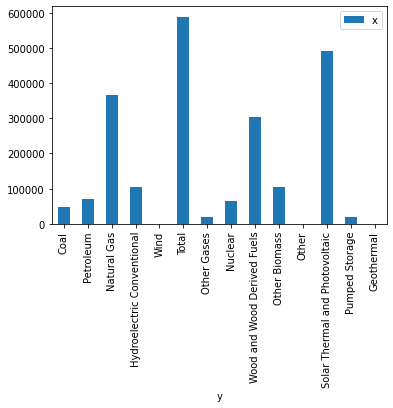

In [13]:
producer_type = energia_df['GENERATION']
producer_type
type(producer_type)
TEPI = energia_df.loc[energia_df['GENERATION'] == 'Total Electric Power Industry']

# tranformar variables no numericas a numericas
le = preprocessing.LabelEncoder()
le.fit(producer_type)

list(le.classes_)

numeric_producer_type = le.transform(producer_type)
#np.sort(numeric_producer_type)

energy_sr = energia_df['ENERGY SOURCE'].unique()
energy_sr

count_producers = energia_df['ENERGY SOURCE'].value_counts()
num_producers = count_producers.values
#np.sort(num_producers)

df = pd.DataFrame({'x':producer_type[:14], 'y': energy_sr[:14]})
#df.sort_values(by=['x', 'y'])
df.plot('y','x', kind='bar')